<h2 align="center">PERCEPTRON MULTICAPA
    <h3 align="center">Clasificación binaria: predicción del valor empresarial de Red Hat


# Contexto analítico

Este caso se basa en un reto propuesto por Red Hat en la plataforma Kaggle. (https://www.kaggle.com/c/predicting-red-hat-business-value/data) 

Red Hat es capaz de obtener una importante cantidad de información de comportamiento de sus clientes. El interes de la compañia se basa en la busqueda de mejores metodos para analizar sus clientes para predecir sobre cuales deberian hacer un especial enfasis que podrian convertirse en clientes de alto valor.

En este reto se propone crear un algoritmo de clasificación que identifique los clientes con mayor potencial para convertirse en clientes de alto valor para Red Hat basados en su actividad.

Se cuenta con dos datasets (people.csv y act_train.csv) los cuales cargaremos directamente a Colab.


In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import io
#from google.colab import files         #Librería necesaria para interactuar con archivos "en Colab"

In [2]:
#Cargamos los dataset
#uploaded = files.upload()
#people = pd.read_csv(io.StringIO(uploaded['people.csv'].decode('utf-8')), sep = ',' )
people = pd.read_csv('C:\\Users\\YULY\\Desktop\\Desktop\\PROGRAMACION ESTADISTICA\\Curso Data Science\\keras\\scripts\\people.csv', sep = ',' )
people.head(3)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99


In [3]:
#people.dtypes
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   people_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null  bool  
 20  char

El primer hecho a resaltar es que la información se presenta anonimizada, algo muy común en la ciencia de datos. 

Se aprecia una gran cantidad de campos de naturaleza categórica. 



In [4]:
#uploaded1 = files.upload()
#activity = pd.read_csv(io.StringIO(uploaded1['act_train.csv'].decode('utf-8')), sep = ',' )
activity = pd.read_csv('C:\\Users\\YULY\\Desktop\\Desktop\\PROGRAMACION ESTADISTICA\\Curso Data Science\\keras\\scripts\\act_train.csv', sep = ',' )
activity.head(3)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [5]:
print(activity.shape)

(2197291, 15)


Se puede observar que en **people_id** existen las mismas llaves que el anterior archivo lo cual podria indicar unirlos, además algunas columnas similares. La completitud e integridad de la informacion es importante analizar.

# <h1 id="ingenieria">Ingeniería de datos</h1>

Evaluaremos ahora el tamaño de los datasets y la completitud de información en las distintas variables disponibles.

In [6]:
print(people.shape)
100*people.isnull().sum()/people.shape[0]   # cantiodad de registros nulos en los datos  ---> tasa de nulos=o  el conjunto de datos tiene toda la info

(189118, 41)


people_id    0.0
char_1       0.0
group_1      0.0
char_2       0.0
date         0.0
char_3       0.0
char_4       0.0
char_5       0.0
char_6       0.0
char_7       0.0
char_8       0.0
char_9       0.0
char_10      0.0
char_11      0.0
char_12      0.0
char_13      0.0
char_14      0.0
char_15      0.0
char_16      0.0
char_17      0.0
char_18      0.0
char_19      0.0
char_20      0.0
char_21      0.0
char_22      0.0
char_23      0.0
char_24      0.0
char_25      0.0
char_26      0.0
char_27      0.0
char_28      0.0
char_29      0.0
char_30      0.0
char_31      0.0
char_32      0.0
char_33      0.0
char_34      0.0
char_35      0.0
char_36      0.0
char_37      0.0
char_38      0.0
dtype: float64

In [7]:
#Repetimos el procedimiento con el dataset de activity
print(activity.shape)
100*activity.isnull().sum()/activity.shape[0]

(2197291, 15)


people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               92.826849
char_2               92.826849
char_3               92.826849
char_4               92.826849
char_5               92.826849
char_6               92.826849
char_7               92.826849
char_8               92.826849
char_9               92.826849
char_10               7.173151
outcome               0.000000
dtype: float64

Se evidencia que los campos char_1 al char_9 tienen el 92% de sus valores en nulo Esta cantidad es muy elevada para aplicar metodos de imputación, por lo cual optaremos por elminar las columnas con este inconveniente.

In [8]:
activity.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [9]:
activity.drop(columns=['char_1','char_2', 'char_3', 'char_4', 'char_5', 'char_6',\
                       'char_7', 'char_8','char_9'],inplace=True)
print(activity.shape)
activity.head(3)

(2197291, 6)


,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0


Para consolidar un dataset debemos tener un par de consideraciones previas: 

* Se aprecia que existen dos variables que tienen los mismos nombres en ambos 
datasets (char_2 y char_10) por lo cual es buena practica renombrar estas columnas para evitar confusiones al momento de unificar las fuentes.
* En el caso de la variable categórica "tipo_actividad" existe una proporción de nulos que podemos reemplazar por la moda.



In [10]:
#Renombramos columnas
activity = activity.rename(columns={"date":"fecha_actividad","char_10":"tipo_actividad"})
#Reenplazamos el tipo de actividad por la moda 
activity["tipo_actividad"] = activity["tipo_actividad"].fillna(activity["tipo_actividad"].mode()[0])
#Verificamos el cambio
100*activity.isnull().sum()/activity.shape[0]   #porcentaje de nulos

people_id            0.0
activity_id          0.0
fecha_actividad      0.0
activity_category    0.0
tipo_actividad       0.0
outcome              0.0
dtype: float64

Ahora unificamos los datasets empleando la función merge y evaluamos la consistencia luego de esta operación 

In [11]:
consolidado = activity.merge(people,on=["people_id"],how="inner")
print("Tamaño previo: ",activity.shape)
print("Nuevo tamaño: ",consolidado.shape)

Tamaño previo:  (2197291, 6)
Nuevo tamaño:  (2197291, 46)


La variable objetivo que clasifica la actividad de los usuarios como potenciales clientes es denominada "outcome", evaluaremos la distribución de este variable: 

In [12]:
print("Distribución de outcome: \n", 100*consolidado["outcome"].value_counts()/consolidado.shape[0])

Distribución de outcome: 
 0    55.60456
1    44.39544
Name: outcome, dtype: float64


Como lo hemos mencionado, las redes neuronales requieren de entrada sólo valores numericos, por lo cual debemos convertir aquellas que no lo son. El dataset consolidado cuenta con 46 variables de tipo booleanas, numericas o categóricas que deben ser transformadas.

In [13]:
types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
bool      28
int64      2
object    16
dtype: int64


In [14]:
consolidado = consolidado.replace({False: 0, True: 1})

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de reemplazo",types.groupby(0).size())

Tipos de variables luego de reemplazo 0
int64     30
object    16
dtype: int64


Si recordamos, el identificador people_id se compone por un prefijo "ppl_" seguido de un número único por usuario. En este caso basta con recortar el prefijo para transformar esta variable en numerica.

In [15]:
consolidado.people_id = consolidado.people_id.str.slice(start=4).astype(float).astype(int)
consolidado.head(3)

,people_id,activity_id,fecha_actividad,activity_category,tipo_actividad,outcome,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
1,100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36
2,100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,0,1,1,0,0,1,1,1,0,36


In [16]:
types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de 2do reemplazo",types.groupby(0).size())

Tipos de variables luego de 2do reemplazo 0
int32      1
int64     30
object    15
dtype: int64


Al validar el dataset llamado **consolidado** podemos aplicar la misma metodología previamente mencionada a otro conjunto de columnas: 

"activity_id", "activity_category", "group_1", "tipo_actividad"

In [17]:
consolidado[["activity_id", "activity_category", "group_1", "tipo_actividad"]].head(3)

,activity_id,activity_category,group_1,tipo_actividad
0,act2_1734928,type 4,group 17304,type 76
1,act2_2434093,type 2,group 17304,type 1
2,act2_3404049,type 2,group 17304,type 1


In [18]:
consolidado.activity_id = consolidado.activity_id.str.slice(start=5).astype(float).astype(int)
consolidado.activity_category = consolidado.activity_category.str.slice(start=5).astype(float).astype(int)
consolidado.group_1 = consolidado.group_1.str.slice(start=6).astype(float).astype(int)
consolidado.tipo_actividad = consolidado.tipo_actividad.str.slice(start=5).astype(float).astype(int)

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de 3er reemplazo",types.groupby(0).size())

Tipos de variables luego de 3er reemplazo 0
int32      5
int64     30
object    11
dtype: int64


Evaluemos las variables que siguen tipo object y averiguemos la cantidad de valores distintos que poseen:

In [19]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(consolidado[line].unique()))+" distinct values")

La variable fecha_actividad contiene: 411 distinct values
La variable char_1 contiene: 2 distinct values
La variable char_2 contiene: 3 distinct values
La variable date contiene: 1196 distinct values
La variable char_3 contiene: 43 distinct values
La variable char_4 contiene: 25 distinct values
La variable char_5 contiene: 9 distinct values
La variable char_6 contiene: 7 distinct values
La variable char_7 contiene: 25 distinct values
La variable char_8 contiene: 8 distinct values
La variable char_9 contiene: 9 distinct values


En el resultado anterior se identifica: 

* la variable _fecha_actividad_ tiene 411 valores diferentes.
* la variable _char_1_ tiene 2 valores diferentes.
* la variable _char_2_ tiene 3 valores diferentes.
* Asi sucesivamente

### Trabajo con variables datetime

Del listado anterior resaltamos dos variables tipo fecha ("date", "fecha_actividad") Para la red neuronal representa una oportunidad poder extraer una serie de caracteristicas adicionales que le permitan entender patrones estacionales de diferentes periodicidades (diario, semanal, mensual, etc) es por esto que crearemos una serie de variables adicionales (de naturaleza numérica) a partir de estas dos fechas:

In [20]:
#Convertimos la variable objeto en datetime
consolidado["date"] = pd.to_datetime(consolidado["date"])

In [21]:
#Creamos nuevas variables
consolidado["dia"] = consolidado["date"].dt.day
consolidado["dia_semana"] = consolidado["date"].dt.weekday
consolidado["semana"] = consolidado["date"].dt.week
consolidado["mes"] = consolidado["date"].dt.month
consolidado["trimestre"] = consolidado["date"].dt.quarter
consolidado["año"] = consolidado["date"].dt.year
consolidado.head(4)

C:\Users\YULY\anaconda\envs\base2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,people_id,activity_id,fecha_actividad,activity_category,tipo_actividad,outcome,char_1,group_1,char_2,date,...,char_35,char_36,char_37,char_38,dia,dia_semana,semana,mes,trimestre,año
0,100,1734928,2023-08-26,4,76,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
1,100,2434093,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
2,100,3404049,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021
3,100,3651215,2023-08-04,2,1,0,type 2,17304,type 2,2021-06-29,...,1,1,0,36,29,1,26,6,2,2021


In [22]:
#Repetimos el procedimiento anterior con fecha_actividad
consolidado["fecha_actividad"] = pd.to_datetime(consolidado["fecha_actividad"])
consolidado["dia_actividad"] = consolidado["fecha_actividad"].dt.day
consolidado["dia_semana_actividad"] = consolidado["fecha_actividad"].dt.weekday
consolidado["semana_actividad"] = consolidado["fecha_actividad"].dt.week
consolidado["mes_actividad"] = consolidado["fecha_actividad"].dt.month
consolidado["trimestre_actividad"] = consolidado["fecha_actividad"].dt.quarter
consolidado["año_actividad"] = consolidado["fecha_actividad"].dt.year
consolidado.head(4)

C:\Users\YULY\anaconda\envs\base2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,people_id,activity_id,fecha_actividad,activity_category,tipo_actividad,outcome,char_1,group_1,char_2,date,...,semana,mes,trimestre,año,dia_actividad,dia_semana_actividad,semana_actividad,mes_actividad,trimestre_actividad,año_actividad
0,100,1734928,2023-08-26,4,76,0,type 2,17304,type 2,2021-06-29,...,26,6,2,2021,26,5,34,8,3,2023
1,100,2434093,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,26,6,2,2021,27,1,39,9,3,2022
2,100,3404049,2022-09-27,2,1,0,type 2,17304,type 2,2021-06-29,...,26,6,2,2021,27,1,39,9,3,2022
3,100,3651215,2023-08-04,2,1,0,type 2,17304,type 2,2021-06-29,...,26,6,2,2021,4,4,31,8,3,2023


In [23]:
#Delete the original date columns
del(consolidado["date"])
del(consolidado["fecha_actividad"])

In [24]:
types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de 4to reemplazo",types.groupby(0).size())

Tipos de variables luego de 4to reemplazo 0
int32      5
int64     42
object     9
dtype: int64


**Nos restan 9 variables tipo objeto para poder cambiarla a numerica.**

In [25]:
consolidado.head(3)

,people_id,activity_id,activity_category,tipo_actividad,outcome,char_1,group_1,char_2,char_3,char_4,...,semana,mes,trimestre,año,dia_actividad,dia_semana_actividad,semana_actividad,mes_actividad,trimestre_actividad,año_actividad
0,100,1734928,4,76,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,26,5,34,8,3,2023
1,100,2434093,2,1,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,27,1,39,9,3,2022
2,100,3404049,2,1,0,type 2,17304,type 2,type 5,type 5,...,26,6,2,2021,27,1,39,9,3,2022


## One Hot Encoding

Con la relativa pequeña cantidad de variables categoricas que manejamos vamos a proceder a realizar la conversión por One Hot Encoding

In [26]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(consolidado[line].unique()))+" distinct values")

La variable char_1 contiene: 2 distinct values
La variable char_2 contiene: 3 distinct values
La variable char_3 contiene: 43 distinct values
La variable char_4 contiene: 25 distinct values
La variable char_5 contiene: 9 distinct values
La variable char_6 contiene: 7 distinct values
La variable char_7 contiene: 25 distinct values
La variable char_8 contiene: 8 distinct values
La variable char_9 contiene: 9 distinct values


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#ejemplo de One Hot Encoder
columna='char_6'
le = LabelEncoder()
le_ajustado=le.fit_transform(consolidado[columna]).reshape(-1,1)
le_ajustado[:10]

In [28]:
encoder = OneHotEncoder(sparse=False)
column = [columna+ "_"+ str(i) for i in le.classes_]
column

['char_6_type 1',
 'char_6_type 2',
 'char_6_type 3',
 'char_6_type 4',
 'char_6_type 5',
 'char_6_type 6',
 'char_6_type 7']

In [29]:
pd.DataFrame(encoder.fit_transform(le_ajustado),columns =column).head(10)

,char_6_type 1,char_6_type 2,char_6_type 3,char_6_type 4,char_6_type 5,char_6_type 6,char_6_type 7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0


* Si la primer observación era tipo3, entonces todas las filas serán 0 excepto en la columna **type_3** 
* Si alguna observación era tipo6, entonces todas las filas serán 0 excepto en la columna **type_6** 
* El procedimiento es el mismo para las demás observaciones.

---


El siguiente código hace el **One Hot Encodin** de una forma más rápida. 

In [30]:
#Se define función que captura el dataframe y la columna para retornar un dataframe luego de OHE
def crea_OneHotEncoding(df, columna):
  le = LabelEncoder()
  le_ajustado=le.fit_transform(df[columna]).reshape(-1,1)
  encoder = OneHotEncoder(sparse=False)
  column = [columna+ "_"+ str(i) for i in le.classes_]
  data = encoder.fit_transform(le_ajustado)
  return(pd.DataFrame(data,columns =column))

In [31]:
numeric_columns = list(set(types.index[types[0] =="int64"].values) - set(["outcome"]))
variables_consolidadas = consolidado[numeric_columns]
objetivo = consolidado["outcome"]

categoricas = types.index[types[0] == 'O'].values
for column in categoricas:
  df = crea_OneHotEncoding(consolidado,column)
  variables_consolidadas = pd.concat([variables_consolidadas,df],axis=1)
  print("Columna ",column, " transformada!")

print("Tamaño final del dataset transformado:",variables_consolidadas.shape)

Columna  char_1  transformada!
Columna  char_2  transformada!
Columna  char_3  transformada!
Columna  char_4  transformada!
Columna  char_5  transformada!
Columna  char_6  transformada!
Columna  char_7  transformada!
Columna  char_8  transformada!
Columna  char_9  transformada!
Tamaño final del dataset transformado: (2197291, 172)


Se tiene la misma cantidad deregistros pero con la diferencia de más columnas (variables) 172 .

In [33]:
variables_consolidadas.head(3)

,año,char_37,char_11,char_27,char_26,char_14,char_16,char_34,trimestre,mes_actividad,...,char_8_type 8,char_9_type 1,char_9_type 2,char_9_type 3,char_9_type 4,char_9_type 5,char_9_type 6,char_9_type 7,char_9_type 8,char_9_type 9
0,2021,0,0,1,0,1,1,1,2,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0,0,1,0,1,1,1,2,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,0,0,1,0,1,1,1,2,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se logra observar que todas las variables son de tipo numerica.

# MUESTRAS DE ENTRENAMIENTO, VALIDACIÓN Y PRUEBA

Con el dataset ya consolidado procedemos a seleccionar las muestras de:

* **Entrenamiento**.
* **Validación**. Los datos de _validación_ son tomados a partir del dataset de _entrenamiento_. 
* **prueba**. (con el que al final se evaluará para hacer pruebas)

In [34]:
from sklearn.model_selection import train_test_split

#Entrenamiento y prueba con relación 80:20
x_train, x_test, y_train, y_test = train_test_split(variables_consolidadas,objetivo, test_size=0.2,random_state=2020)
#Entrenamiento y validación con relación 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=2020)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (1582048, 172)
Shape of x_test: (439459, 172)
Shape of x_val: (175784, 172)
Shape of y_train: (1582048,)
Shape of y_test: (439459,)
Shape of y_val: (175784,)


El entrenamisntodurara mucho tiempo, ya que son (1582048, 172) obs de entrenamiento, es recomendable entonces implementar una arquitectura y realizar pruebas con un número pequeño de iteraciones o epocas, dependiendo de losresultados en estas épocas se decide si se cambia la arquitecura o si incrementasolamente el número de iteraciones.

# <h1 id="arquitectura">Arquitectura Propuesta</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Debido a que el problema consiste en un clasificador binario la función de perdidas más recomendada es **"binary_crossentropy"**.
* De manera similar una función de activación que se adecua al tipo de problema es la **"sigmoid"**.
* La metrica para evaluación sera la precisión **"accuracy"**
* Debido a la gran cantidad de información el entrenamiento tomara más tiempo, en este escenario se implementaran arquitecturas más pequeñas con pocas epocas de entrenamiento y se escalará el modelo a medida los resultados del accuracy mejoren.

In [36]:
#Se realizara un pequeño modelo ----> secuential

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Red neuronal pequeña
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))#Al tener 177 var entrada, comenz con capa de 256 neuronas. input_dim = dimens d imput
model.add(Dense(256,activation="relu"))                             # Aqui funcionara la función de activación _relu_ 
model.add(Dense(1,activation = "sigmoid"))                          # 1 nerurona de salida, usamos _sigmoid_
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               44288     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 110,337
Trainable params: 110,337
Non-trainable params: 0
_________________________________________________________________
None


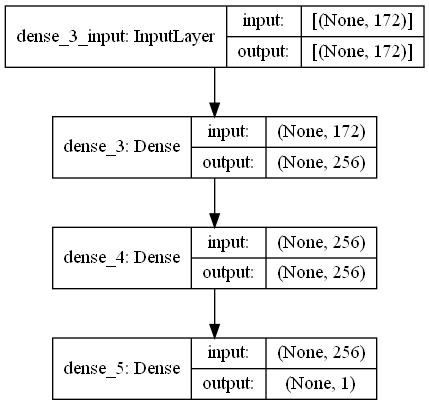

In [37]:
plot_model(model, to_file='model.png',show_shapes=True)

In [38]:
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)    #entrenando con 3 epochs

Epoch 1/3
24720/24720 [==============================] - 133s 5ms/step - loss: 1.1105 - accuracy: 0.7992 - val_loss: 0.3169 - val_accuracy: 0.8586
Epoch 2/3
24720/24720 [==============================] - 100s 4ms/step - loss: 0.3181 - accuracy: 0.8578 - val_loss: 0.3131 - val_accuracy: 0.8584
Epoch 3/3
24720/24720 [==============================] - 101s 4ms/step - loss: 0.3151 - accuracy: 0.8598 - val_loss: 0.3248 - val_accuracy: 0.8533


In [39]:
print("Distribución de outcome: \n", 100*consolidado['outcome'].value_counts()/consolidado.shape[0] )

Distribución de outcome: 
 0    55.60456
1    44.39544
Name: outcome, dtype: float64


El accuracy en cada iteración no está aprendiendo se estanca en 0.85 (no tiene un buen desempeño y daria igual clasificar aleatoriamente) . Además al observar la proporción se afirma que el 55% de los valores se clasificacan como 0 "cero" y el 44 % se clasifica comno "uno" 1

---

Creamos una arquitetctura más grande:

* Colocamos uina nueva capa (intermedia).
* El numero de neuronas porcapa lo multiplicamos por una potencia de 2, en este caso 256*2.
* Dejamos la misma funcion de activación por capa **ReLU**.
* Realizamos 3 **epochs**.


In [40]:
#Red neuronal de 2 capas
model = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 381s 12ms/step - loss: 0.9554 - accuracy: 0.8268 - val_loss: 0.3155 - val_accuracy: 0.8598
Epoch 2/3
24720/24720 [==============================] - 300s 12ms/step - loss: 0.3175 - accuracy: 0.8593 - val_loss: 0.3127 - val_accuracy: 0.8598
Epoch 3/3
24720/24720 [==============================] - 337s 14ms/step - loss: 0.3120 - accuracy: 0.8604 - val_loss: 0.3082 - val_accuracy: 0.8626


Mejoro un poco el accuracy, sin embargo puede mejorar aún más. En el caso de haber escalado la red los resultados sigan siendo descepcionantes. se sugiere  volver a validar los datos disponibles. En este punto existen dos opciones a explorar: 

* Estandarizar las variables numericas disponibles.
* Volver a realizar el One Hot Encoding.

In [41]:
x_train.head(3)

,año,char_37,char_11,char_27,char_26,char_14,char_16,char_34,trimestre,mes_actividad,...,char_8_type 8,char_9_type 1,char_9_type 2,char_9_type 3,char_9_type 4,char_9_type 5,char_9_type 6,char_9_type 7,char_9_type 8,char_9_type 9
1742909,2021,1,1,0,0,0,1,1,2,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711687,2022,1,1,1,0,1,1,1,4,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2054827,2022,0,0,0,0,0,0,0,4,10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Estandarización de todas las variables pues existen valores en otro rango más alto
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [43]:
#Red neuronal anterior cambiando datasets.
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 342s 13ms/step - loss: 0.2563 - accuracy: 0.8868 - val_loss: 0.1621 - val_accuracy: 0.9331
Epoch 2/3
24720/24720 [==============================] - 350s 14ms/step - loss: 0.1448 - accuracy: 0.9405 - val_loss: 0.1249 - val_accuracy: 0.9500
Epoch 3/3
24720/24720 [==============================] - 346s 14ms/step - loss: 0.1100 - accuracy: 0.9560 - val_loss: 0.1040 - val_accuracy: 0.9592


Con sólo la estandarización de la información el desempeño del modelo ha mejorado drasticamente logrando una precision del 96%! Podriamos seguir evaluanto redes más grandes, pero es un valor aceptable para nosotros por el momento. El siguiente paso es probar este mismo modelo con información que la red nunca haya visto (set de prueba)

---
####  Prueba del modelo

In [ ]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",
str(round(result[i],2)))

439459/439459 [==============================] - 21s 48us/step
Metric  loss : 0.09
Metric  acc : 0.96


El desempeño con el **set de prueba** sigue siendo bueno por lo cual ya podemos emplear la arquitectura definida y realizar un entrenamiento con un mayor número de epocas.

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=12, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/12
1582048/1582048 [==============================] - 131s 83us/step - loss: 0.1972 - acc: 0.9129 - val_loss: 0.1430 - val_acc: 0.9409
Epoch 2/12
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.1188 - acc: 0.9518 - val_loss: 0.1088 - val_acc: 0.9571
Epoch 3/12
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.0927 - acc: 0.9636 - val_loss: 0.0898 - val_acc: 0.9652
Epoch 4/12
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.0780 - acc: 0.9697 - val_loss: 0.0831 - val_acc: 0.9688
Epoch 5/12
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.0689 - acc: 0.9735 - val_loss: 0.0781 - val_acc: 0.9717
Epoch 6/12
1582048/1582048 [==============================] - 130s 82us/step - loss: 0.0624 - acc: 0.9766 - val_loss: 0.0746 - val_acc: 0.9737
Epoch 7/12
1582048/1582048 [==============================] - 129s 82us/step - loss: 0.05

# <h1 id="evaluacion">Evaluación del modelo</h1>

#### Evaluando el desempeño

La red ha logrado mejorar un poco su desempeño con más epocas de entrenamiento. Finalmente vamos a evaluar gráficamente el desempeño de la función de pérdidas y la presición a traves de cada época de entrenamiento con el fin de validar algun posible sobre-entrenamiento.

In [45]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

13734/13734 [==============================] - 55s 4ms/step - loss: 0.1026 - accuracy: 0.9596 0s - loss: 0.1
Metric  loss : 0.1
Metric  accuracy : 0.96


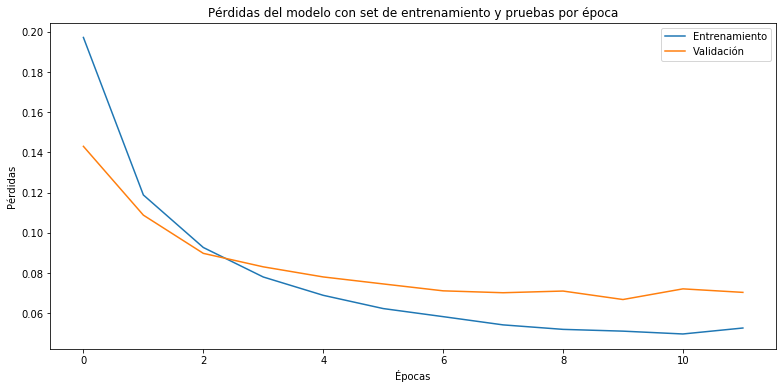

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

A través de las distintas **epochs** la función de pérdidas va disminuyendo tanto con la información de entrenamiento como en la informaciónd e validación.

Miremos ahora lasmétricas de desempeño **accuracy**.

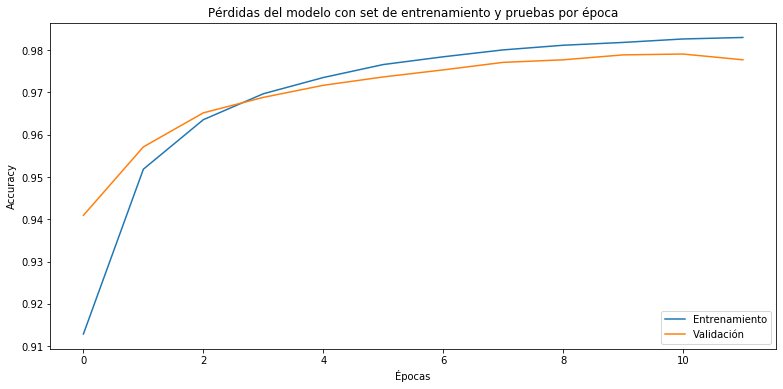

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

Aqí puede observarse que a partir de la réplica 12 el entrenamiento deja de aprender (las curvas se aplanan)